In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
#Input Data
src =pd.read_excel("C:/Users/asus/Downloads/Stunt dataset.xlsx")
src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Kabupaten/Kota Prov Indonesia  520 non-null    object 
 1   Prevalensi Stunting (TB/U) %   520 non-null    float64
 2   K4                             520 non-null    float64
 3   Persalinan FASYANKES           520 non-null    float64
 4   KF Lengkap                     520 non-null    float64
 5   Vit A Ibu                      520 non-null    float64
 6   bumil TTD                      520 non-null    float64
 7   BBLR                           520 non-null    float64
 8   IMD                            520 non-null    float64
 9   ASI                            520 non-null    float64
 10  CPKB                           520 non-null    float64
 11  IDL                            520 non-null    float64
 12  A 611                          520 non-null    flo

In [20]:
#Describe
src.describe

,Prevalensi Stunting (TB/U) %,K4,Persalinan FASYANKES,KF Lengkap,Vit A Ibu,bumil TTD,BBLR,IMD,ASI,CPKB,...,A 1259,A 659,mCPR,Air Minum Layak,Sanitasi Layak,IKP,BPNT 40%,KKS 40%,APK PAUD,UMK
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,5.200000e+02
mean,15.677481,78.308056,82.466731,81.209170,83.740662,73.637825,13.821921,70.264076,55.203190,83.438263,...,81.544438,81.303483,60.058127,75.103154,72.193742,69.585019,20.431157,30.450234,46.817000,2.809076e+06
std,24.280961,23.551987,23.143235,25.594245,28.895392,30.833068,22.008760,26.841913,25.199897,28.803060,...,24.113321,22.471708,28.824597,23.060407,20.685373,16.964203,17.009022,31.213710,20.750632,7.999891e+05
min,0.000000,1.470000,1.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.880000,3.290000,16.000000,0.000000,0.000000,0.710000,0.000000e+00
25%,6.150000,70.600000,74.250000,74.287500,78.000000,65.875000,1.445000,57.900000,40.055000,80.775000,...,74.500000,75.660000,43.675000,61.872500,63.770000,61.682500,8.925000,8.015000,31.930000,2.440486e+06
50%,13.000000,85.949571,89.100000,87.800000,89.620000,83.265000,4.700000,76.750000,60.000000,92.350000,...,87.760000,87.680000,67.000000,82.395000,77.220000,75.055000,17.325000,16.400000,44.915000,2.862231e+06
75%,21.125000,93.425000,97.450000,97.247500,98.400000,93.122500,15.045000,89.450000,75.425000,99.525000,...,96.925000,96.400000,78.057881,93.920000,86.982500,81.125000,26.302500,40.370000,62.032500,3.200000e+06
max,457.000000,125.300000,140.040000,138.100000,172.440000,139.900000,123.810000,127.800000,100.000000,129.800000,...,141.630000,126.060000,141.600000,100.000000,99.080000,94.200000,93.400000,98.720000,96.650000,4.816921e+06


In [21]:
#Cek missing value
src.isna().sum()

Kabupaten/Kota Prov Indonesia    0
Prevalensi Stunting (TB/U) %     0
K4                               0
Persalinan FASYANKES             0
KF Lengkap                       0
Vit A Ibu                        0
bumil TTD                        0
BBLR                             0
IMD                              0
ASI                              0
CPKB                             0
IDL                              0
A 611                            0
A 1259                           0
A 659                            0
mCPR                             0
Air Minum Layak                  0
Sanitasi Layak                   0
IKP                              0
BPNT 40%                         0
KKS 40%                          0
APK PAUD                         0
UMK                              0
dtype: int64

Tidak ada missing value pada dataset

In [55]:
#Binning menurut WHO
categories = ['Rendah','Menengah', 'Tinggi','Sangat Tinggi']
src['Stunt Category'] = pd.cut(src['Prevalensi Stunting (TB/U) %'], bins=[-float('inf'), 10, 20, 30, float('inf')], labels=categories)


#Encoding
category_mapping = {'Rendah': 1, 'Menengah': 2, 'Tinggi': 3, 'Sangat Tinggi': 4}
src['Stunt CatNum'] = src['Stunt Category'].map(category_mapping)
print(src[['Kabupaten/Kota Prov Indonesia','Prevalensi Stunting (TB/U) %', 'Stunt Category', 'Stunt CatNum']])

      Kabupaten/Kota Prov Indonesia  Prevalensi Stunting (TB/U) %  \
0               Kabupaten Bangkalan                          26.2   
1              Kabupaten Banyuwangi                          18.1   
2                  Kabupaten Blitar                          14.3   
3              Kabupaten Bojonegoro                          24.3   
4               Kabupaten Bondowoso                          32.0   
..                              ...                           ...   
515      Kabupaten Sumba Barat Daya                          13.0   
516          Kabupaten Sumba Tengah                          12.0   
517           Kabupaten Sumba Timur                          10.0   
518  Kabupaten Timor Tengah Selatan                          13.0   
519    Kabupaten Timor Tengah Utara                          23.0   

    Stunt Category Stunt CatNum  
0           Tinggi            3  
1         Menengah            2  
2         Menengah            2  
3           Tinggi            3  
4

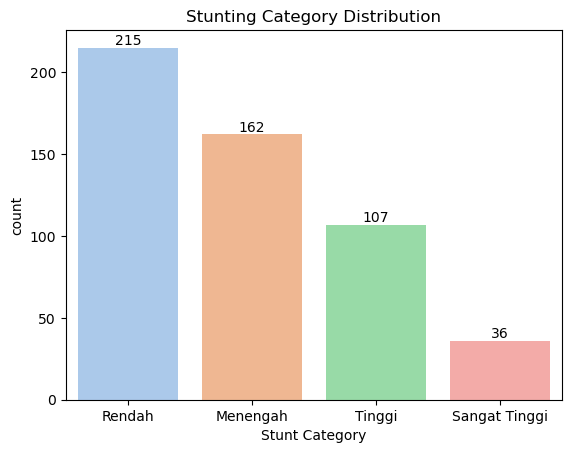

In [53]:
sns.countplot(x='Stunt Category', data=src, palette=sns.color_palette('pastel')[0:5])

# Adding data labels
for i, value in enumerate(src['Stunt Category'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Stunting Category Distribution')
plt.show()

In [24]:
srcnokab = src.drop(['Kabupaten/Kota Prov Indonesia','Stunt Category','Stunt CatNum'], axis=1)
print(srcnokab.head(5))

   Prevalensi Stunting (TB/U) %    K4  Persalinan FASYANKES  KF Lengkap  \
0                          26.2  85.9                  88.0        86.2   
1                          18.1  94.8                  97.4        84.9   
2                          14.3  77.2                  80.2        80.0   
3                          24.3  85.6                  93.5        90.4   
4                          32.0  84.9                 103.3       103.1   

   Vit A Ibu  bumil TTD  BBLR   IMD   ASI   CPKB  ...  A 1259  A 659  mCPR  \
0       94.1       62.8  14.0  92.1  31.8   66.2  ...    76.7   75.6  71.6   
1       89.9       81.8  19.8  75.5  76.3   96.8  ...    96.4   95.9  70.0   
2       80.3       78.7  24.3  60.6  57.5   83.5  ...    89.5   89.9  75.1   
3       93.5       87.3  33.0  78.7  93.9   97.8  ...    99.6   98.8  72.1   
4      105.7       89.2  57.8  96.8  82.7  104.8  ...    98.1   98.0  73.4   

   Air Minum Layak  Sanitasi Layak    IKP  BPNT 40%  KKS 40%  APK PAUD  \
0     

In [26]:
#cek outlier
Q1 = srcnokab.quantile(q=.25)
Q3 = srcnokab.quantile(q=.75)
IQR = Q3-Q1

data_iqr = srcnokab[-((srcnokab < (Q1-1.5*IQR)) | (srcnokab >(Q3+1.5*IQR))).any(axis=1)]
data_iqr.shape

print("Dimensi dataset awal", srcnokab.shape)
print("Dimensi dataset setelah pengecekan outlier", data_iqr.shape)

Dimensi dataset awal (520, 22)
Dimensi dataset setelah pengecekan outlier (274, 22)


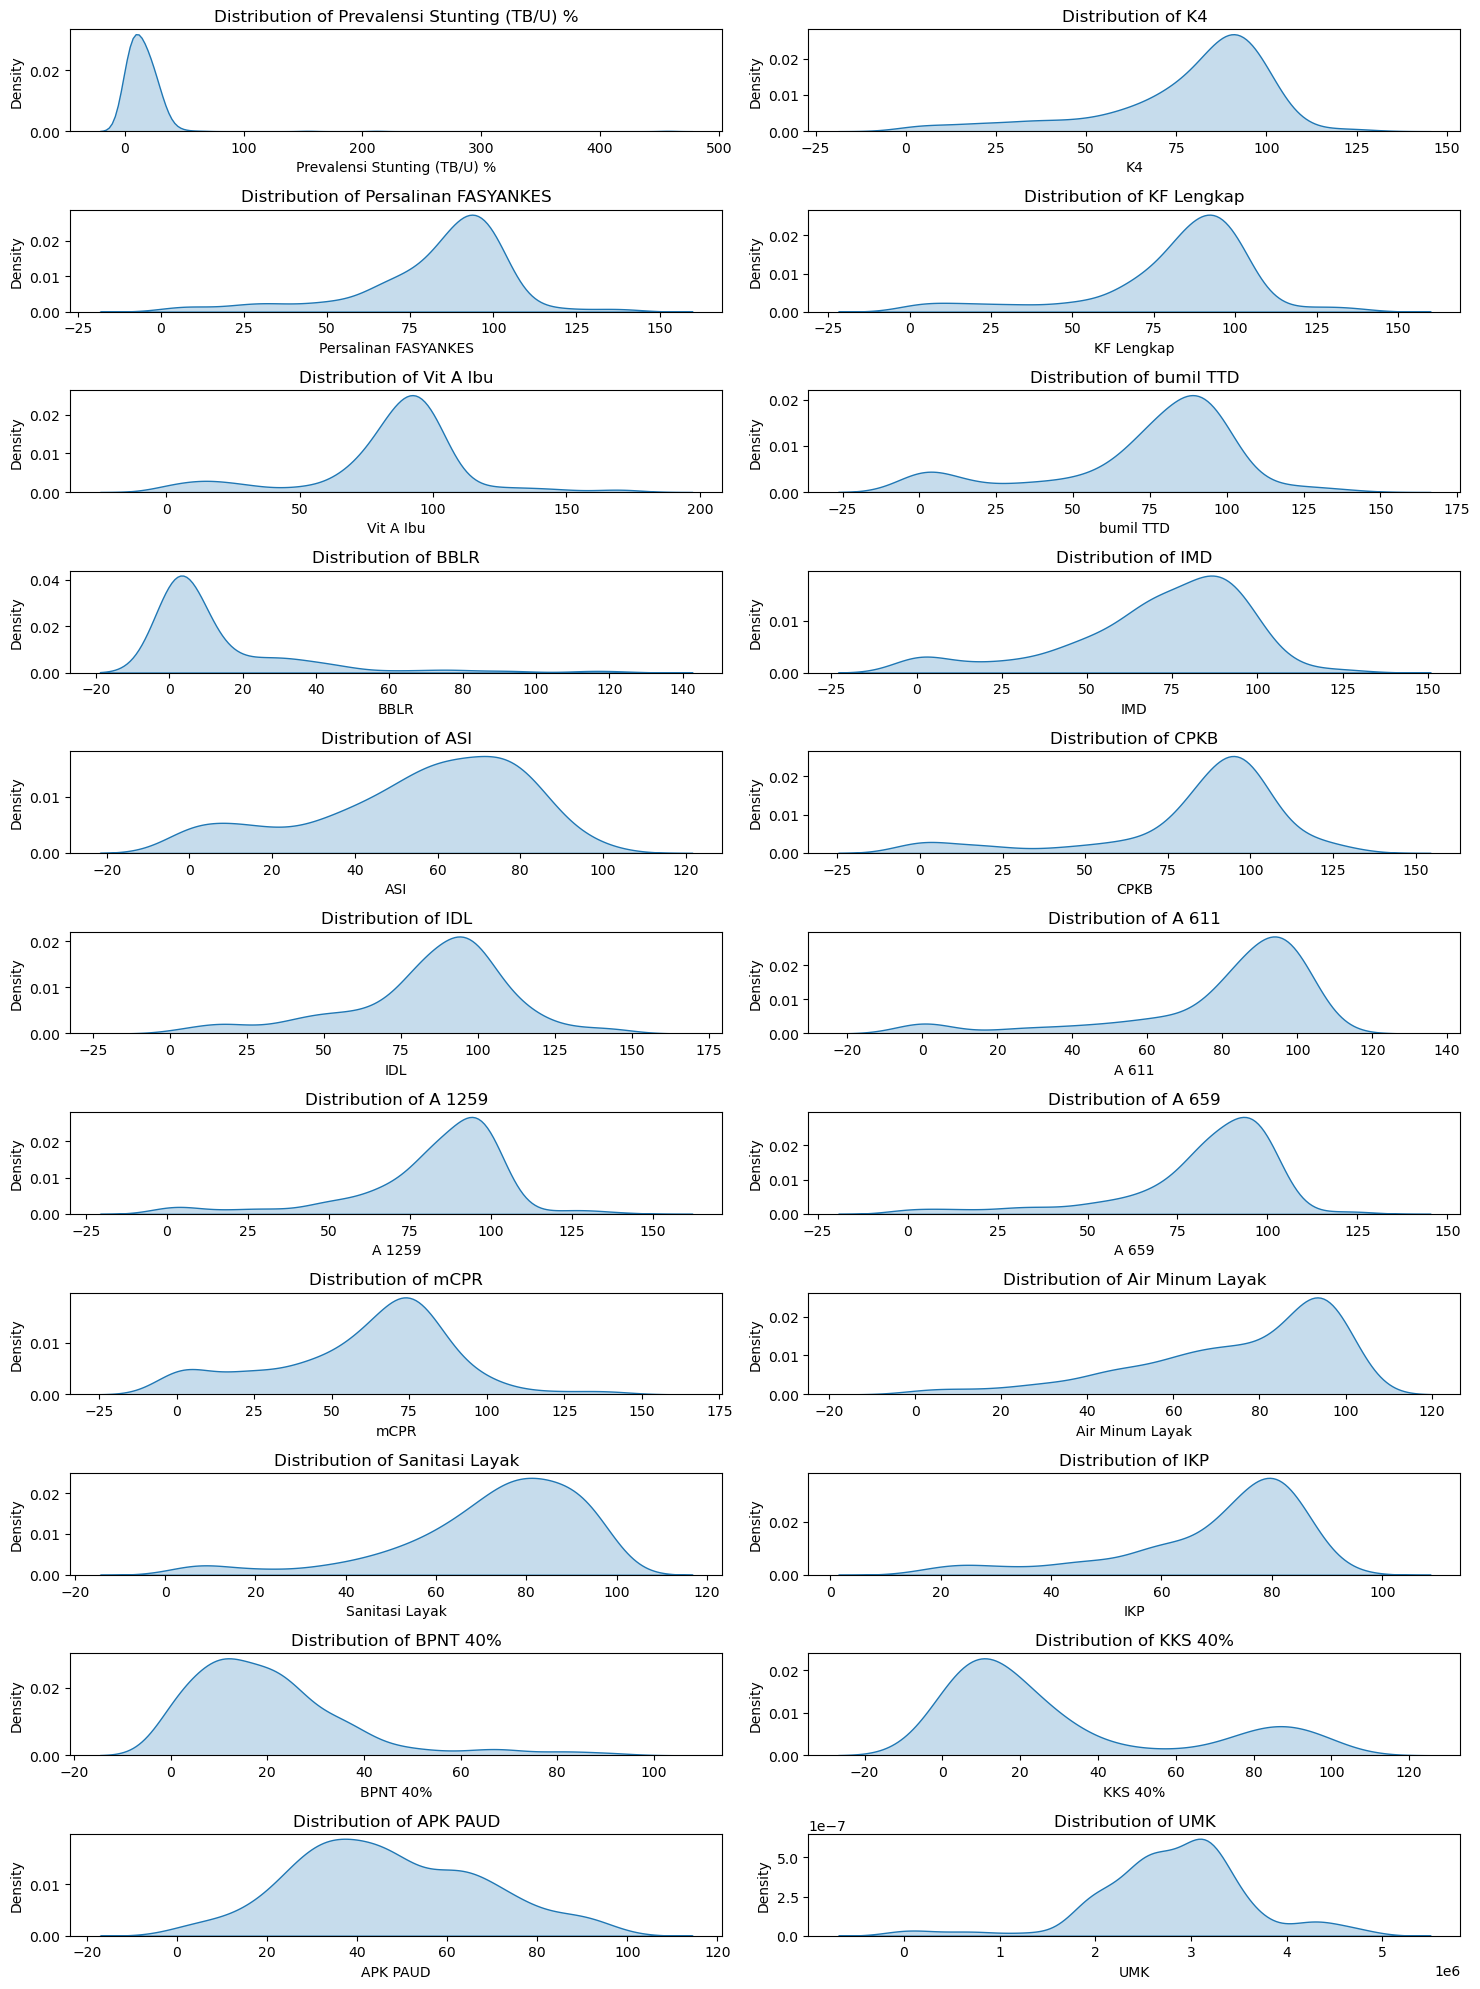

In [49]:
#cek distribusi

nrows = 11
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 20))

for i, var in enumerate(srcnokab):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=srcnokab, x=var, ax=axes[row, col], fill=True)
    axes[row, col].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

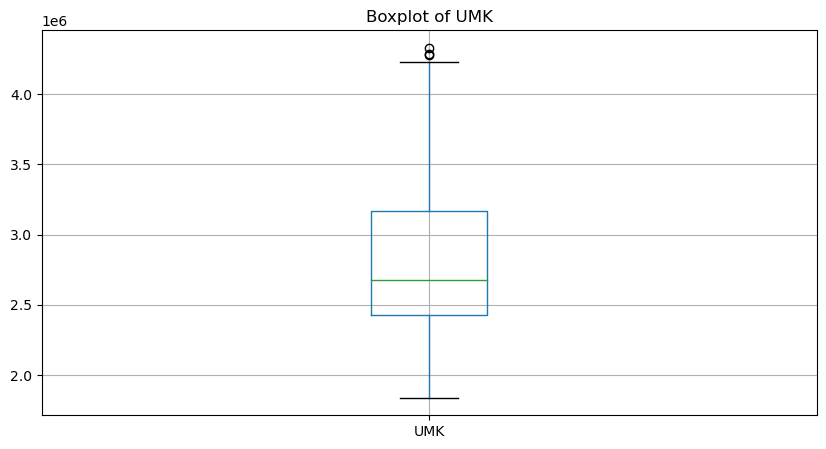

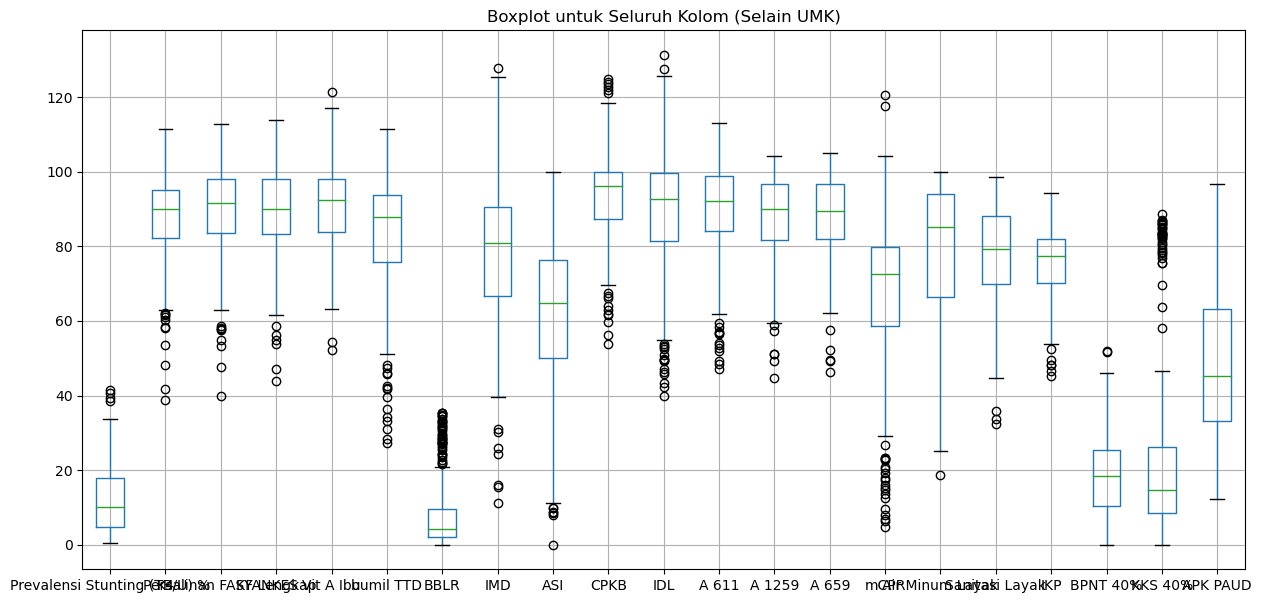

In [38]:
#cek outlier menggunakan boxplot

# Membuat boxplot untuk kolom 'UMK'
data_iqr[['UMK']].boxplot(figsize=(10, 5))
plt.title('Boxplot of UMK')
plt.show()

# Memilih semua kolom kecuali 'UMK'
data_iqr_without_UMK = data_iqr.drop('UMK', axis=1)

# Membuat boxplot untuk seluruh kolom (selain 'UMK')
data_iqr_without_UMK.boxplot(figsize=(15, 7), vert=True)  # vert=False agar boxplot horizontal
plt.title('Boxplot untuk Seluruh Kolom (Selain UMK)')
plt.show()

Terdapat outlier yang terdeteksi pada masing-masing fitur jika menggunakan perhitungan IQR sehingga perlu dilakukan penanganan outlier. Sebelum itu akan dilakukan pengecekan distribusi data

In [50]:
#cek skewness
for var_name in srcnokab:
    skewness = round(srcnokab[var_name].skew(), 3)
    print(f'Skewness of {var_name}: {skewness}')

Skewness of Prevalensi Stunting (TB/U) %: 13.017
Skewness of K4: -1.401
Skewness of Persalinan FASYANKES: -1.307
Skewness of KF Lengkap: -1.381
Skewness of Vit A Ibu: -0.849
Skewness of bumil TTD: -1.131
Skewness of BBLR: 2.633
Skewness of IMD: -1.027
Skewness of ASI: -0.681
Skewness of CPKB: -1.633
Skewness of IDL: -0.878
Skewness of A 611: -1.836
Skewness of A 1259: -1.513
Skewness of A 659: -1.733
Skewness of mCPR: -0.428
Skewness of Air Minum Layak: -1.1
Skewness of Sanitasi Layak: -1.383
Skewness of IKP: -1.382
Skewness of BPNT 40%: 1.64
Skewness of KKS 40%: 1.09
Skewness of APK PAUD: 0.242
Skewness of UMK: -0.638


Fitur-fitur dengan skewness negatif menunjukkan persebaran data yang besar ke arah kanan, menunjukkan bahwa nilai-nilai tersebut cenderung besar. Oleh karena itu, untuk mengatasi adanya pencilan (outlier), akan dilakukan standardisasi.

In [51]:
#standardization
from sklearn import preprocessing
srcz = preprocessing.scale(srcnokab)
srcz

array([[ 0.43378231,  0.32265872,  0.2393182 , ..., -0.65467682,
         0.70923903, -1.06641861],
       [ 0.09986639,  0.70091003,  0.64587553, ..., -0.11416977,
        -0.05339914, -0.60080731],
       [-0.05678553, -0.04709256, -0.09803787, ...,  0.03831383,
         1.0150661 , -0.99347532],
       ...,
       [-0.23404954, -2.77560203, -1.27445906, ...,  2.16618955,
        -1.53477918, -0.02977162],
       [-0.11037697,  1.89941419, -0.49594504, ..., -0.75200336,
         0.0088275 ,  0.58191388],
       [ 0.30186491, -1.33059702,  1.45034002, ...,  1.7813729 ,
        -0.71473813, -0.31955558]])

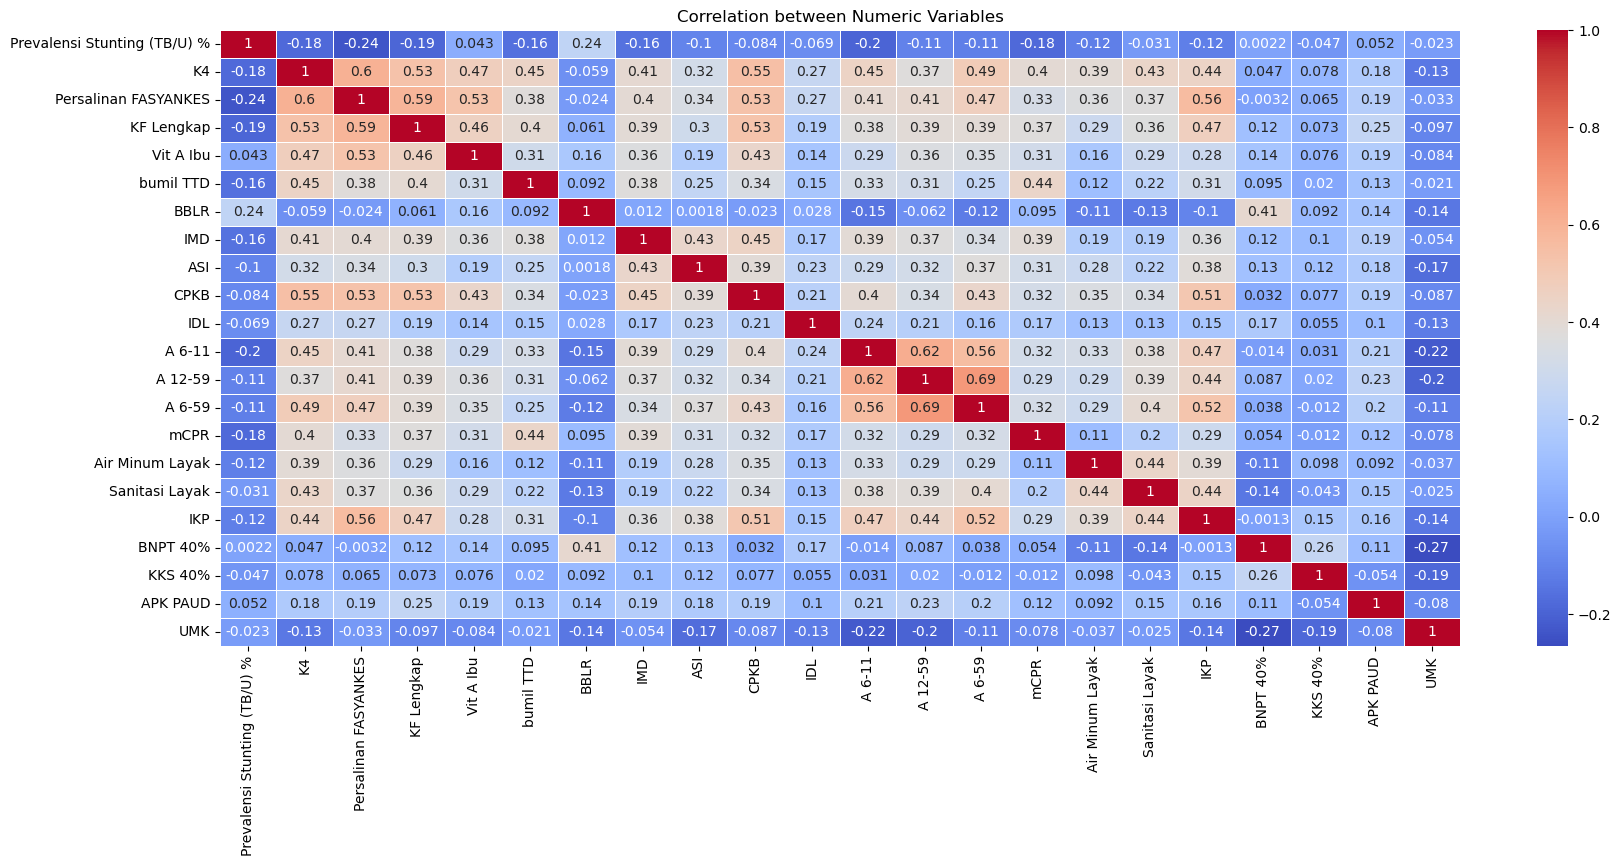

In [59]:
#feature selection using correlation
srcz_df = pd.DataFrame(srcz, columns=['Prevalensi Stunting (TB/U) %', 'K4',
                                      'Persalinan FASYANKES', 'KF Lengkap', 'Vit A Ibu', 'bumil TTD', 'BBLR',
                                      'IMD', 'ASI', 'CPKB', 'IDL', 'A 6-11', 'A 12-59', 'A 6-59', 'mCPR',
                                      'Air Minum Layak', 'Sanitasi Layak', 'IKP', 'BNPT 40%', 'KKS 40%',
                                      'APK PAUD','UMK'])

correlation = srcz_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between Numeric Variables")
plt.show()

Pemilihan fitur didasarkan pada korelasi yang mendekati nilai 0,5, menunjukkan hubungan yang kuat. Fitur lainnya tidak dipertimbangkan karena memiliki korelasi yang mendekati 0.

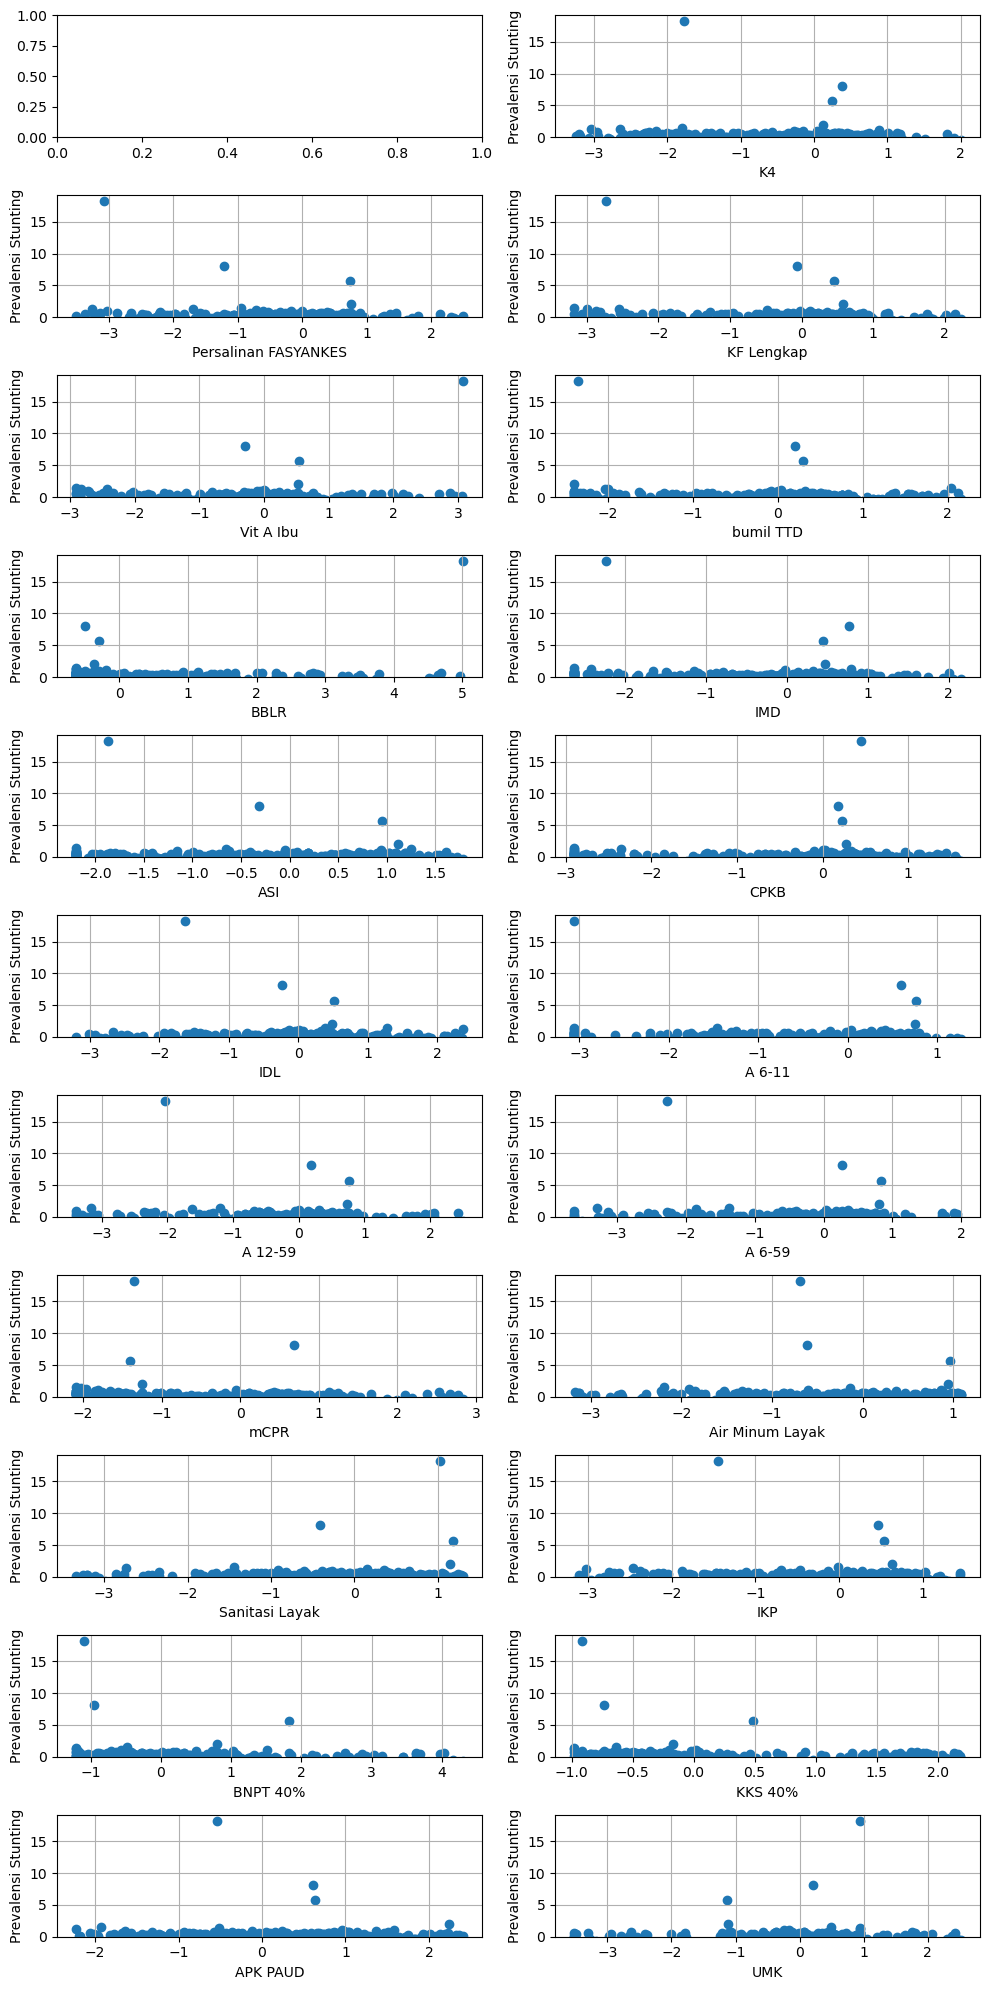

In [62]:
# Plotting scatterplots in a grid

fig, axes = plt.subplots(11, 2, figsize=(10, 20))

for i, ax in enumerate(axes.flatten()):
    if i == 0:
        continue  # Skip the first subplot

    x = srcz_df.iloc[:, i]
    y = srcz_df['Prevalensi Stunting (TB/U) %']

    ax.scatter(x, y, marker='o')
    ax.grid()
    ax.set_ylim(ymin=0)
    ax.set_xlabel(srcz_df.columns[i])
    ax.set_ylabel('Prevalensi Stunting')

plt.tight_layout()
plt.show()

In [61]:
#K-means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

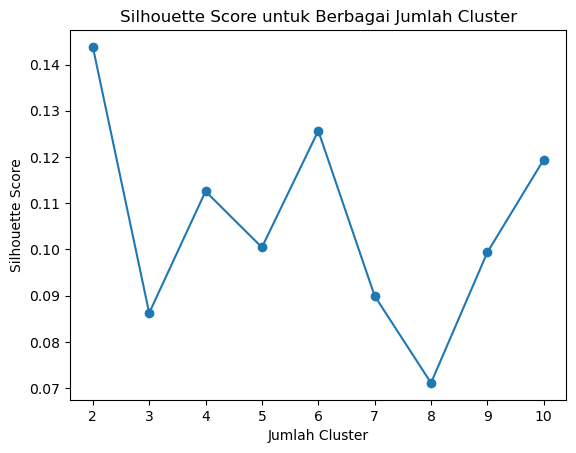

Silhouette Score for 2 clusters: 0.144
Silhouette Score for 3 clusters: 0.086
Silhouette Score for 4 clusters: 0.113
Silhouette Score for 5 clusters: 0.100
Silhouette Score for 6 clusters: 0.126
Silhouette Score for 7 clusters: 0.090
Silhouette Score for 8 clusters: 0.071
Silhouette Score for 9 clusters: 0.099
Silhouette Score for 10 clusters: 0.119


In [16]:
import os

# Set OMP_NUM_THREADS to 1 to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=100)
    kmeans.fit(srcz)
    silhouette_scores.append(silhouette_score(srcz, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.show()

for i, score in enumerate(silhouette_scores, 2):
    print(f"Silhouette Score for {i} clusters: {score:.3f}")

Berdasarkan grafik di atas dapat diketahui bahwa jumlah cluster yang optimal adalah 2 (dua). Hal ini disebabkan oleh nilai silhouette yang paling tinggi terjadi ketika jumlah cluster = 2.

In [63]:
#feature selected based on corr
X = srcz[:, [1, 2, 3, 6, 11, 14]]
Y = srcz[:, 0]

In [64]:
# Suppress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [71]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=100)
labels = k_means.fit_predict(X)
print((labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 1 

In [72]:
#menambahkan labels sebagai kolom baru
src['Cluster']=labels
src.head()

,Kabupaten/Kota Prov Indonesia,Prevalensi Stunting (TB/U) %,K4,Persalinan FASYANKES,KF Lengkap,Vit A Ibu,bumil TTD,BBLR,IMD,ASI,...,Air Minum Layak,Sanitasi Layak,IKP,BPNT 40%,KKS 40%,APK PAUD,UMK,Stunt Category,Stunt CatNum,Cluster
0,Kabupaten Bangkalan,26.2,85.9,88.0,86.2,94.1,62.8,14.0,92.1,31.8,...,93.91,53.48,70.59,19.515,10.035,61.52,1956773.48,Tinggi,3,0
1,Kabupaten Banyuwangi,18.1,94.8,97.4,84.9,89.9,81.8,19.8,75.5,76.3,...,95.97,78.07,83.82,23.645,26.890,45.71,2328899.12,Menengah,2,0
2,Kabupaten Blitar,14.3,77.2,80.2,80.0,80.3,78.7,24.3,60.6,57.5,...,96.37,80.11,84.34,25.115,31.645,67.86,2015071.18,Menengah,2,0
3,Kabupaten Bojonegoro,24.3,85.6,93.5,90.4,93.5,87.3,33.0,78.7,93.9,...,96.51,91.01,83.55,23.600,31.055,86.76,2079568.07,Tinggi,3,0
4,Kabupaten Bondowoso,32.0,84.9,103.3,103.1,105.7,89.2,57.8,96.8,82.7,...,93.31,51.64,73.78,23.365,31.720,64.60,1958640.12,Sangat Tinggi,4,0


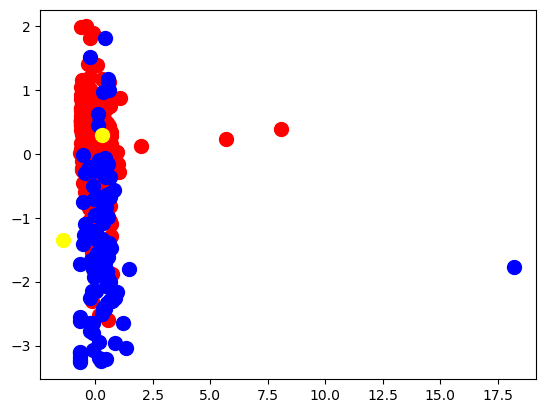

In [73]:
# Plotting the results
plt.scatter(srcz[labels==0, 0], srcz[labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(srcz[labels==1, 0], srcz[labels==1, 1], s=100, c='blue', label ='Cluster 2')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.show()

In [74]:
#Keanggotaan Kabupaten/Kota berdasarkan Cluster
grouped_data = src.groupby('Cluster')

for cluster, group_data in grouped_data:
    print(f"Cluster {cluster}:")
    print(group_data.iloc[:, 0])
    print("\n")


Cluster 0:
0                 Kabupaten Bangkalan
1                Kabupaten Banyuwangi
2                    Kabupaten Blitar
3                Kabupaten Bojonegoro
4                 Kabupaten Bondowoso
                    ...              
511               Kabupaten Rote Ndao
513                   Kabupaten Sikka
515        Kabupaten Sumba Barat Daya
516            Kabupaten Sumba Tengah
518    Kabupaten Timor Tengah Selatan
Name: Kabupaten/Kota Prov Indonesia, Length: 425, dtype: object


Cluster 1:
113                           Dairi
115              Humbang Hasundutan
118               Kota Gunungsitoli
131                      Nias Barat
132                    Nias Selatan
                   ...             
510                 Kabupaten Ngada
512           Kabupaten Sabu Raijua
514           Kabupaten Sumba Barat
517           Kabupaten Sumba Timur
519    Kabupaten Timor Tengah Utara
Name: Kabupaten/Kota Prov Indonesia, Length: 95, dtype: object




In [75]:
#karakteristik tiap kluster
grouped_data.mean()

,Prevalensi Stunting (TB/U) %,K4,Persalinan FASYANKES,KF Lengkap,Vit A Ibu,bumil TTD,BBLR,IMD,ASI,CPKB,...,A 1259,A 659,mCPR,Air Minum Layak,Sanitasi Layak,IKP,BPNT 40%,KKS 40%,APK PAUD,UMK
Cluster,,,,,,,,,,,,,,,,,,,,,
0,13.549106,85.723528,89.462871,88.440703,89.325953,78.991178,12.382318,75.381052,58.998319,90.666832,...,86.327267,86.259544,66.536660,78.740400,76.437388,73.836659,19.930721,30.665827,48.514235,2.789366e+06
1,25.199158,45.133579,51.168211,48.857571,58.753832,49.688618,20.262249,47.372343,38.224983,51.099929,...,60.147572,59.131630,31.075215,58.831263,53.209007,50.564526,22.669947,29.485736,39.224105,2.897253e+06


Cluster 0 memiliki rata-rata prevalensi stunting yang lebih tinggi daripada cluster 1, sehingga Kabupaten/Kota yang tergabung pada cluster 0 memiliki rata-rata prevalensi stunting yang lebih tinggi daripada Kabupaten/Kota di Cluster 1.

Number of clusters: 2, Calinski-Harabasz Index: 123.42
Number of clusters: 3, Calinski-Harabasz Index: 93.02
Number of clusters: 4, Calinski-Harabasz Index: 79.04
Number of clusters: 5, Calinski-Harabasz Index: 68.89
Number of clusters: 6, Calinski-Harabasz Index: 63.00
Number of clusters: 7, Calinski-Harabasz Index: 56.16
Number of clusters: 8, Calinski-Harabasz Index: 53.41
Number of clusters: 9, Calinski-Harabasz Index: 49.67
Number of clusters: 10, Calinski-Harabasz Index: 46.25


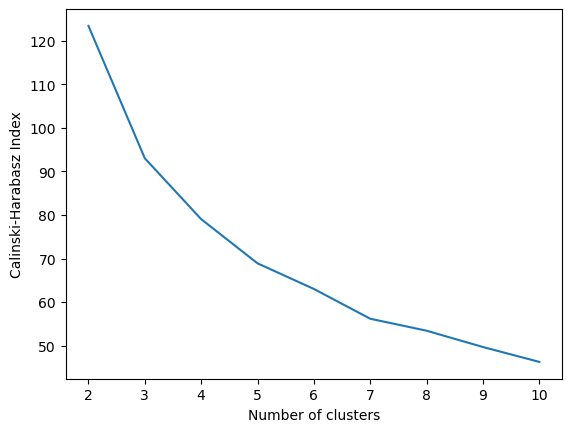

In [76]:
# Cluster performance
import sklearn
results = {}

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=100)
    labels = kmeans.fit_predict(srcz)
    db_index = sklearn.metrics.calinski_harabasz_score(srcz, labels)
    results.update({i: db_index})

# Menampilkan hasil dan menambahkan data label
for k, v in results.items():
    print(f"Number of clusters: {k}, Calinski-Harabasz Index: {v:.2f}")

# Plotting
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()


Kualitas pengelompokkan Kabupaten/Kota berdasarkan variabel prediktor menjadi 2 klaster dapat dinilai melalui nilai Silhouette dan Calinski-Harabasz Index. Kedua metrik ini menunjukkan bahwa pemilihan 2 klaster adalah keputusan yang optimal, karena keduanya mencapai titik tertinggi pada jumlah klaster tersebut.

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [78]:
#splitting training & testing + all scalling
srcz_df['Cluster']=labels
srcz_df['StuntCatNum']= src['Stunt CatNum']

Xc = srcz_df.iloc[:, list(range(1, 21))]
Yc = srcz_df.iloc[:, 22]
xc_train, xc_test, yc_train, yc_test = train_test_split(Xc, Yc, test_size=0.2, random_state=1)
print ('Train set:',xc_train.shape, yc_train.shape)
print ('Test set:', xc_test.shape, yc_test.shape)

Train set: (416, 20) (416,)
Test set: (104, 20) (104,)


In [79]:
from sklearn import svm
model_SVM = svm.SVC(kernel='linear')
model_SVM.fit(xc_train, yc_train)
yc_pred_SVM = model_SVM.predict(xc_test)
print(classification_report(yc_test, yc_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.83      0.83      0.83         6
           2       0.67      1.00      0.80         2
           3       0.88      1.00      0.93         7
           4       0.88      0.94      0.91        31
           6       0.89      0.89      0.89         9
           7       1.00      0.86      0.92         7
           8       1.00      0.71      0.83         7
           9       0.78      0.93      0.85        15

    accuracy                           0.88       104
   macro avg       0.88      0.88      0.87       104
weighted avg       0.90      0.88      0.88       104



In [80]:
from sklearn import svm
model_SVM = svm.SVC(kernel='rbf')
model_SVM.fit(xc_train, yc_train)
yc_pred_SVM = model_SVM.predict(xc_test)
print(classification_report(yc_test, yc_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         2
           3       0.70      1.00      0.82         7
           4       0.90      0.90      0.90        31
           6       0.90      1.00      0.95         9
           7       1.00      0.71      0.83         7
           8       1.00      0.71      0.83         7
           9       0.75      1.00      0.86        15

    accuracy                           0.88       104
   macro avg       0.92      0.89      0.89       104
weighted avg       0.91      0.88      0.89       104



In [81]:
from sklearn import svm
model_SVM = svm.SVC(kernel='sigmoid')
model_SVM.fit(xc_train, yc_train)
yc_pred_SVM = model_SVM.predict(xc_test)
print(classification_report(yc_test, yc_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       1.00      0.33      0.50         6
           2       0.06      0.50      0.10         2
           3       0.80      0.57      0.67         7
           4       0.90      0.90      0.90        31
           6       0.90      1.00      0.95         9
           7       1.00      0.71      0.83         7
           8       0.00      0.00      0.00         7
           9       0.76      0.87      0.81        15

    accuracy                           0.75       104
   macro avg       0.71      0.63      0.63       104
weighted avg       0.83      0.75      0.77       104



In [82]:
from sklearn import svm
model_SVM = svm.SVC(kernel='poly')
model_SVM.fit(xc_train, yc_train)
yc_pred_SVM = model_SVM.predict(xc_test)
print(classification_report(yc_test, yc_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        20
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         2
           3       1.00      0.86      0.92         7
           4       0.49      1.00      0.66        31
           6       1.00      0.44      0.62         9
           7       1.00      0.43      0.60         7
           8       1.00      0.86      0.92         7
           9       0.50      0.20      0.29        15

    accuracy                           0.66       104
   macro avg       0.89      0.66      0.72       104
weighted avg       0.78      0.66      0.65       104

